In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("default of credit card clients.xls", header=1, index_col="ID")

In [3]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


# Kontrol

## Anormallikler

İçe aktarılan veri seti içerisindeki gözlemlerde değişkenlerin aldığı değerlerin veri sağlayıcısı tarafından verilen bilgiler ile uyuşup uyuşmadığının kontrolü.

In [4]:
# Kategorik veriler için kurallar
categoric_attribute_information = {
    "SEX": [1,2],
    "EDUCATION": [1, 2, 3, 4],
    "MARRIAGE": [1, 2, 3]
}

for column in categoric_attribute_information.keys():
    unique_values = list(set(df[column].tolist()))
    if unique_values == categoric_attribute_information[column]:
        print("DOĞRU", column, categoric_attribute_information[column], "==", unique_values, "\n")
    else:
        print("HATA!", column, categoric_attribute_information[column], "!=", unique_values, "\n")

DOĞRU SEX [1, 2] == [1, 2] 

HATA! EDUCATION [1, 2, 3, 4] != [0, 1, 2, 3, 4, 5, 6] 

HATA! MARRIAGE [1, 2, 3] != [0, 1, 2, 3] 



Burada cinsiyet verisini içeren değişkene ait gözlemlerde bir anormallik olmadığı tespit edildi fakat hem eğitim seviyesi hem de medeni durum değişkenlerine ait gözlemlerde ortak olarak 0 kategorisi veri sağlayıcısı tarafından verilen kategoriler arasında yer almamaktadır. Bu kategori eğitim seviyesi ve medeni durumun belirtilmediğini ifade ediyor olabilir.

Eğitim durumunda ise diğer diye bir kategori olmasına rağmen 5 ve 6 olmak üzere fazladan iki kategori daha olduğu tespit edildi. Daha sonradan eklenmiş kategoriler olabilir. Bunlar ile tüm anormallikleri tespit ettikten sonra ilgileneceğim.
<hr>
Veri sağlayısı tarafından yaş değişkeninin alabileceği değerler hakkında bir bilgi verilmemiştir. Fakat bu veri setinin Taiwanda kredi kartı sahibi insan olduğunu bilerek basitçe mümkün olabilecek minimum ve maksimum yaşı araştırabiliriz. Aşağıda linki verilmiş kaynakta Taiwanda kredi kartı alabilmek için gerekli minimum yaş kriterinin 20 olduğu belirtilmekte.

https://www.hsbc.com.tw/en-tw/credit-cards/faq/

In [5]:
print("En küçük yaş:", min(df["AGE"].tolist()), "\n")
print("En büyük yaş:", max(df["AGE"].tolist()), "\n")

En küçük yaş: 21 

En büyük yaş: 79 



Gözlemler arasındaki en küçük yaş kurala uyduğundan burada bir problem yok. En büyük yaş için bir kural yok fakat 79 değeri makul görünüyor.
<hr>
Veri sağlayısı tarafından PAY_0 - ... - PAY_6  değişkenleri için verilen kural aşağıdaki gibidir:

$$ 
test(x) = \left\{
\begin{array}{}
      True & x=-1 \\
      True & x>0\\
\end{array} 
\right.
$$

In [6]:
columns_starts_with_pay = [column for column in df.columns if column[:4] == "PAY_" and len(column) == 5]

for column in columns_starts_with_pay:
    unique_values = list(set(df[column].tolist()))
    for value in unique_values:
        if not ((value == -1) or (value > 0)):
            print("HATA!", column, "=", value)

HATA! PAY_0 = 0
HATA! PAY_0 = -2
HATA! PAY_2 = 0
HATA! PAY_2 = -2
HATA! PAY_3 = 0
HATA! PAY_3 = -2
HATA! PAY_4 = 0
HATA! PAY_4 = -2
HATA! PAY_5 = 0
HATA! PAY_5 = -2
HATA! PAY_6 = 0
HATA! PAY_6 = -2


Veri sağlayısı tarafından bu değişkenler için verilen alınabilecek değerler arasında 0 ve -2 verilmemiştir. Bu değerlerin de ne anlama geldiğini bilmiyoruz. Aşağıdaki linkte bu veri seti hakkında veri sağlayısından alınan ekstra bilgiler mevcuttur.

https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608#latest-325928

Bu kaynağa göre anormallik tespit ettiğimiz değişkenler için veri sağlayıcısının verdiği bilgiler aşağıdaki gibidir;

    - X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
    - X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
    - X6 - X11: History of past payment (-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above).
    
Burada eğitim seviyesi değişkeninde 0, 4, 5, 6 kategorilerini tek kategori altında toplamak haricinde yapılacak birşey yok gibi görünüyor.

Ayrıca bu veri seti içerisindeki gözlemlerin hem bireysel kredi kartı sahibi müşterilere hem de ek karta sahip müşterilere ait olabileceği bilgisi de verilmiştir bu durumda Taiwan da kredi kartı alma koşulları arasında minimum yaşın ek kart için 16 olduğu bilgisine dayanarak veri seti içerisindeki yaş aralığını tekrardan doğrulamış olduk.

In [7]:
def combine_categories(x):
    if x in [4, 5, 6]:
        return 0
    else:
        return x

df["EDUCATION"] = df["EDUCATION"].apply(
    lambda x: combine_categories(x)
)

In [8]:
list(set(df["EDUCATION"].tolist()))

[0, 1, 2, 3]

## Eksik Veri
Veri seti içerisinde eksik değer içeren bir değişken ve gözlem yoktur.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

# Ön işleme
## Sayısallaştırma

Bu veri seti içerisindeki tüm değişkenler sayısaldır yani bir sayısallaştırma gereksinimi yoktur. Fakat aslında kategorik olan medeni hal değişkeni içerisindeki verilerin birbiri üzerinde bir büyüklük durumu olmadığından bu değişkeni ve ayrıca eğitim seviyesi değişkenini sayısaldan kategoriğe dönüştürüp one hot encoder ile tekrar sayısallaştıracağım.

In [10]:
# Eğitim seviyesi kategorileri
education_categories = {
    0: "others",
    1: "graduate_student",
    2: "university",
    3: "high_school",
}
# Medeni durum kategorileri
# Bu kategoriler yukarıda linkini verdiğim kaynağa göre veri sağlayıcısı tarafından sonradan düzeltilen kategorilerdir
marriage_categories = {
    0: "others",
    1: "married",
    2: "single",
    3: "divorce"
}

for category in education_categories.keys():
    df["EDUCATION"][df["EDUCATION"] == category] = education_categories[category]
    
for category in marriage_categories:
    df["MARRIAGE"][df["MARRIAGE"] == category] = marriage_categories[category]
    
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,high_school,married,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,high_school,single,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,university,single,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [11]:
# One Hot Encoder
categoric_variables = df.select_dtypes(
    include=[np.object]
).columns.tolist()
df = pd.get_dummies(df, prefix=categoric_variables)

# Hedef değişkeni sayısaldan kategorik tipe dönüştürüldü
df["default payment next month"][df["default payment next month"] == 1] = "Yes"
df["default payment next month"][df["default payment next month"] == 0] = "No"

df

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,default payment next month,EDUCATION_graduate_student,EDUCATION_high_school,EDUCATION_others,EDUCATION_university,MARRIAGE_divorce,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,24,2,2,-1,-1,-2,-2,3913,...,0,Yes,0,0,0,1,0,1,0,0
2,120000,2,26,-1,2,0,0,0,2,2682,...,2000,Yes,0,0,0,1,0,0,0,1
3,90000,2,34,0,0,0,0,0,0,29239,...,5000,No,0,0,0,1,0,0,0,1
4,50000,2,37,0,0,0,0,0,0,46990,...,1000,No,0,0,0,1,0,1,0,0
5,50000,1,57,-1,0,-1,0,0,0,8617,...,679,No,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,39,0,0,0,0,0,0,188948,...,1000,No,0,1,0,0,0,1,0,0
29997,150000,1,43,-1,-1,-1,-1,0,0,1683,...,0,No,0,1,0,0,0,0,0,1
29998,30000,1,37,4,3,2,-1,0,0,3565,...,3100,Yes,0,0,0,1,0,0,0,1


## Normalizasyon

In [12]:
# 0 - 1 Normalizasyon
numeric_variables = df.select_dtypes(
    exclude=[np.object]
).columns.tolist()
for variable in numeric_variables:
    data = list(set(df[variable].tolist()))
    min_value = min(data)
    max_value = max(data)
    df[variable] = df[variable].apply(
        lambda x: (x-min_value)/(max_value-min_value)
    )
    
df

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,default payment next month,EDUCATION_graduate_student,EDUCATION_high_school,EDUCATION_others,EDUCATION_university,MARRIAGE_divorce,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
ID,,,,,,,,,,,,,,,,,,,,,
1,0.010101,1.0,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,...,0.000000,Yes,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.111111,1.0,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,...,0.003783,Yes,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.080808,1.0,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,...,0.009458,No,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.040404,1.0,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,...,0.001892,No,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.040404,0.0,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,...,0.001284,No,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.212121,0.0,0.310345,0.2,0.2,0.2,0.2,0.2,0.2,0.313716,...,0.001892,No,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
29997,0.141414,0.0,0.379310,0.1,0.1,0.1,0.1,0.2,0.2,0.148008,...,0.000000,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
29998,0.020202,0.0,0.275862,0.6,0.5,0.4,0.1,0.2,0.2,0.149674,...,0.005864,Yes,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Modelleme
## Hedef Kategorilerin Dağılımı
Hedef değişkenin kategorileri arasındaki orana bakıldığında dengesiz bir dağılım olduğu görülmektedir. Bu durum oluşacak modelin başarısını negatif etkileyecektir.

In [13]:
count_yes = df["default payment next month"].tolist().count("Yes")
count_no = df["default payment next month"].tolist().count("No")
print("Yes sayısı:", count_yes)
print(" No sayısı:", count_no)
print(" Yes oranı:", count_yes / (count_yes+count_no))

Yes sayısı: 6636
 No sayısı: 23364
 Yes oranı: 0.2212


## Verinin Eğitim İçin Hazırlanması

In [14]:
df = df.rename(columns={"default payment next month": "target"})

X = df.drop(columns=["target"]).values
y = df.filter(["target"])
y = pd.get_dummies(y, prefix=["target"]).values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [15]:
X_train.shape

(20100, 29)

In [16]:
X_test.shape

(9900, 29)

In [17]:
y_train.shape

(20100, 2)

In [18]:
y_test.shape

(9900, 2)

In [19]:
split = int(len(y_test)/2)
inputX = X_train
inputY = y_train
inputX_valid = X_test[:split]
inputY_valid = y_test[:split]
inputX_test = X_test[split:]
inputY_test = y_test[split:]

## Model

In [20]:
input_nodes = inputX.shape[1]

multiplier = 3

hidden_nodes1 = input_nodes
hidden_nodes2 = round(hidden_nodes1 * multiplier)
hidden_nodes3 = round(hidden_nodes2 * multiplier)

pkeep = tf.placeholder(tf.float32)

# Input
x = tf.placeholder(tf.float32, [None, input_nodes])

# Layer 1
W1 = tf.Variable(tf.truncated_normal([input_nodes, hidden_nodes1], stddev = 0.15))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

# Layer 2
W2 = tf.Variable(tf.truncated_normal([hidden_nodes1, hidden_nodes2], stddev = 0.15))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)

# Layer 3
W3 = tf.Variable(tf.truncated_normal([hidden_nodes2, hidden_nodes3], stddev = 0.15)) 
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.sigmoid(tf.matmul(y2, W3) + b3)
y3 = tf.nn.dropout(y3, pkeep)

# Layer 4
W4 = tf.Variable(tf.truncated_normal([hidden_nodes3, 2], stddev = 0.15)) 
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)

# Output
y = y4
y_ = tf.placeholder(tf.float32, [None, 2])

training_epochs = 100
training_dropout = 0.9
display_step = 10
n_samples = y_train.shape[0]
batch_size = 2048
learning_rate = 0.01

# Cross entropy
cost = -tf.reduce_sum(y_ * tf.log(y))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

accuracy_summary = []
cost_summary = []
valid_accuracy_summary = [] 
valid_cost_summary = [] 
stop_early = 0

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        for batch in range(int(n_samples/batch_size)):
            batch_x = inputX[batch*batch_size : (1+batch)*batch_size]
            batch_y = inputY[batch*batch_size : (1+batch)*batch_size]
            
            sess.run([optimizer], feed_dict={
                x: batch_x,
                y_: batch_y,
                pkeep: training_dropout
            })
            
        if (epoch) % display_step == 0:
            train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={
                x: inputX,
                y_: inputY,
                pkeep: training_dropout
            })
            
            valid_accuracy, valid_newCost = sess.run([accuracy, cost], feed_dict={
                x: inputX_valid,
                y_: inputY_valid,
                pkeep: 1
            })
            
            print(
                "Epoch:", epoch,
                "Acc =", "{:.5f}".format(train_accuracy),
                "Cost =", "{:.5f}".format(newCost),
                "Valid_Acc =", "{:.5f}".format(valid_accuracy),
                "Valid_Cost = ", "{:.5f}".format(valid_newCost)
            )
            
            accuracy_summary.append(train_accuracy)
            cost_summary.append(newCost)
            valid_accuracy_summary.append(valid_accuracy)
            valid_cost_summary.append(valid_newCost)
            
            if valid_accuracy < max(valid_accuracy_summary) and epoch > 100:
                stop_early += 1
                if stop_early == 15:
                    break
            else:
                stop_early = 0
                
    print("Optimization Finished!")

Epoch: 0 Acc = 0.23527 Cost = 20615.38672 Valid_Acc = 0.22303 Valid_Cost =  4986.06982
Epoch: 10 Acc = 0.77731 Cost = 10413.49707 Valid_Acc = 0.77697 Valid_Cost =  2530.53345
Epoch: 20 Acc = 0.80040 Cost = 9540.35254 Valid_Acc = 0.79212 Valid_Cost =  2350.82959
Epoch: 30 Acc = 0.80453 Cost = 9397.13672 Valid_Acc = 0.79899 Valid_Cost =  2320.72534
Epoch: 40 Acc = 0.80806 Cost = 9307.13086 Valid_Acc = 0.80101 Valid_Cost =  2305.47705
Epoch: 50 Acc = 0.80905 Cost = 9252.25586 Valid_Acc = 0.80586 Valid_Cost =  2295.08472
Epoch: 60 Acc = 0.81124 Cost = 9214.68848 Valid_Acc = 0.80990 Valid_Cost =  2283.80615
Epoch: 70 Acc = 0.81279 Cost = 9158.87207 Valid_Acc = 0.80929 Valid_Cost =  2272.10840
Epoch: 80 Acc = 0.81612 Cost = 9107.00000 Valid_Acc = 0.81091 Valid_Cost =  2259.07520
Epoch: 90 Acc = 0.81831 Cost = 9069.38672 Valid_Acc = 0.81333 Valid_Cost =  2250.82031
Optimization Finished!


## Model Başarısı
Test için olan cost ve accuracy mavi renkte, validasyon için gösterilen cost ve accuracy ise yeşil renktedir.

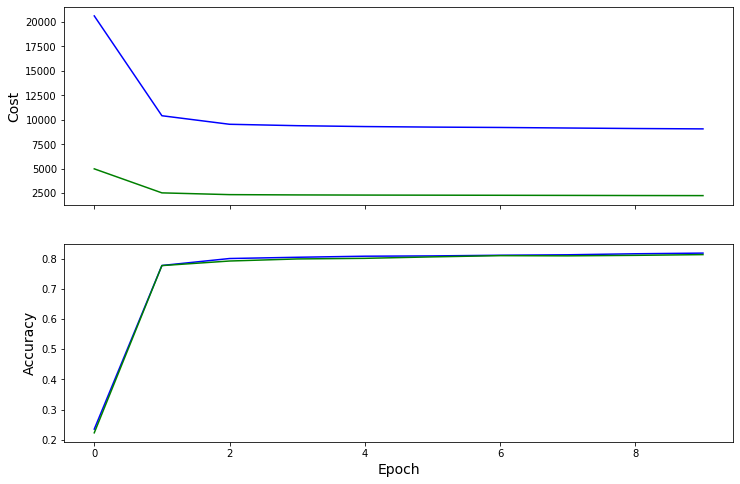

In [22]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))

axes[0].set_ylabel("Cost", fontsize=14)
axes[0].plot(cost_summary, color='blue')
axes[0].plot(valid_cost_summary, color='green')

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(accuracy_summary, color='blue')
axes[1].plot(valid_accuracy_summary, color='green')
plt.show()